In [194]:
import py4DSTEM
import pyxem as pxm
import matplotlib.pyplot as plt
import numpy as np
import os

inv_Ang_per_pixel = 0.01053034801747163


def pythag_distance(item):
        pythag_d= np.sqrt((item[0]**2)+(item[1]**2))
        return pythag_d

In [3]:
os.getcwd()

'C:\\Users\\tas72\\Documents\\PhD'

In [6]:
os.chdir(r'C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724')

In [197]:
file_name_braggdisks_masked = r"C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724\braggdisks_mcc.h5"
print(file_name_braggdisks_masked)
py4DSTEM.io.print_h5_tree(file_name_braggdisks_masked)

C:\Users\tas72\Documents\PhD\dg606\py4DSTEM_analysis\20221202_183724\braggdisks_mcc.h5
/
|--4DSTEM
	|--braggvectors_copy
		|--_v_cal
		|--_v_uncal
		|--calibration




In [25]:
bragg_peaks = py4DSTEM.read(
    'braggdisks_masked.h5', 
    root = '/4DSTEM/braggvectors_copy'
)

Reading PointListArray: 100%|██████████████████████████████████████| 262144/262144 [00:36<00:00, 7114.09PointList/s]


In [107]:
test = bragg_peaks._v_uncal.get_pointlist(10,19).data

In [108]:
test

array([(127.35842451, 127.36169733, 219.3096099 ),
       ( 87.08097826,  95.84948285, 108.50888293),
       (147.48085113, 142.70848134,  22.4521331 ),
       (129.02753362, 101.38091454,  17.60324477),
       (167.95719226, 158.74072983,  13.60640135),
       ( 89.76664589,  43.66741156,  12.26337104),
       (103.13038679, 189.3298217 ,  10.66786888),
       ( 75.60087396, 154.05581492,  10.55528579),
       (188.81619599, 147.46023355,   8.98227951),
       (244.47846146, 234.03848556,   8.90071787),
       (131.34541541,  48.96797595,   8.62722476),
       ( 66.02780658, 106.05859234,   7.37318009),
       ( 83.51150686, 174.13207804,   7.0976764 ),
       ( 62.38125801, 158.30423745,   6.53100316),
       (121.19718858, 230.61510768,   6.34857215),
       ( 63.84569081, 132.31218259,   5.68604842),
       (191.24756651, 122.21360128,   5.52995271),
       ( 59.68816396, 209.83453313,   5.46533781),
       (186.25107176, 199.77758637,   5.29830653),
       (230.63800111, 152.91105

In [109]:
bragg_peaks_calibrated = np.zeros((bragg_peaks.shape[0],bragg_peaks.shape[1]),dtype='object')
for i in range(bragg_peaks.shape[0]):
    print(i, end=' ')
    for j in range(bragg_peaks.shape[1]):
        brag_peaks_oi = bragg_peaks._v_uncal.get_pointlist(i,j).data
        calibrated_peaks = np.zeros_like(brag_peaks_oi) #currently peaks are in pixels and 0,0 is not at the center
        for k in range(len(brag_peaks_oi)):
            peak = brag_peaks_oi[k]
            x_coord = peak[0]
            y_coord = peak[1]
            x_coord = x_coord-128
            y_coord = y_coord-128
            x_coord = x_coord*inv_Ang_per_pixel
            y_coord = y_coord*inv_Ang_per_pixel
            calibrated_peaks[k][0] = x_coord
            calibrated_peaks[k][1] = y_coord
            calibrated_peaks[k][2] = peak[2]
            
        bragg_peaks_calibrated[i,j] = calibrated_peaks

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [110]:
bragg_peaks_calibrated[10,19]

array([(-0.00675601, -0.00672155, 219.3096099 ),
       (-0.43089154, -0.33855613, 108.50888293),
       ( 0.20514014,  0.15488543,  22.4521331 ),
       ( 0.01082029, -0.28030823,  17.60324477),
       ( 0.42076314,  0.32371058,  13.60640135),
       (-0.40261052, -0.88805151,  12.26337104),
       (-0.26188568,  0.64582437,  10.66786888),
       (-0.55178103,  0.2743768 ,  10.55528579),
       ( 0.64041571,  0.20492303,   8.98227951),
       ( 1.22655874,  1.11662216,   8.90071787),
       ( 0.03522839, -0.83223472,   8.62722476),
       (-0.65258876, -0.23105066,   7.37318009),
       (-0.46847932,  0.48578684,   7.0976764 ),
       (-0.69098819,  0.31911417,   6.53100316),
       (-0.07163597,  1.0805728 ,   6.34857215),
       (-0.6755672 ,  0.04540878,   5.68604842),
       ( 0.66601889, -0.06093279,   5.52995271),
       (-0.71934741,  0.86174611,   5.46533781),
       ( 0.61340406,  0.75584296,   5.29830653),
       ( 1.08081387,  0.26232211,   5.02083038),
       ( 0.68749901,

In [119]:
peaks_sorted = np.zeros_like(bragg_peaks_calibrated,dtype='object')
lengths_sorted = np.zeros_like(bragg_peaks_calibrated,dtype='object')
for i in range(np.shape(bragg_peaks_calibrated)[0]):
    print(i, end=' ')
    for j in range(np.shape(bragg_peaks_calibrated)[1]):
        nav_axis_oi = bragg_peaks_calibrated[i,j]
        lengths = np.zeros(len(nav_axis_oi))
        for k in range(len(lengths)):
            x,y = nav_axis_oi[k][0],nav_axis_oi[k][1]
            lengths[k] = pythag_distance((x,y))
        #np.argsort(lengths)
        sorted_data = np.zeros_like(nav_axis_oi)
        sorted_lengths = np.zeros_like(lengths)
        p=0
        for ind in np.argsort(lengths):
            sorted_data[p] = nav_axis_oi[ind]
            sorted_lengths[p] = lengths[ind]  
            p+=1
        peaks_sorted[i,j] = sorted_data
        lengths_sorted[i,j] = sorted_lengths

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

Now make adjacency matrix

In [150]:
test = lengths_sorted[0,10]
groups = []
for i in range(len(test)-1):

        point = test[i]
        arg = np.argwhere(test>point+0.01)
        groups.append([np.amin(arg)])
        print(groups)
    
groups = np.unique(groups)
groups = np.insert(groups,0,0)

[[1]]
[[1], [2]]
[[1], [2], [5]]
[[1], [2], [5], [5]]
[[1], [2], [5], [5], [5]]
[[1], [2], [5], [5], [5], [6]]
[[1], [2], [5], [5], [5], [6], [7]]
[[1], [2], [5], [5], [5], [6], [7], [8]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [15]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [15], [15]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [15], [15], [17]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [15], [15], [17], [17]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [15], [15], [17], [17], [18]]
[[1], [2], [5], [5], [5], [6], [7], [8], [10], [10], [11], [12], [14], [

In [173]:
points_oi = peaks_sorted[0,10]
lengths_oi = lengths_sorted[0,10]

In [186]:
adj_matrix_points_list = []

for i in range(len(groups)):
    if i == 0: # -0 is still 0
        continue
        
    group_start = groups[-i]    
    group_end = groups[(-i+1)] # the end group is where the group goes until    
    start_of_group_below = groups[-i-1]
    
    
    if group_end == 0: # put a catch for the end group
        group_end = len(lengths_sorted[0,10])
        
   
    lengths_oi = lengths_sorted[0,10][group_start:group_end]
    points_oi = peaks_sorted[0,10][group_start:group_end]
    
    
    
    
    points_oi_group_below = peaks_sorted[0,10][start_of_group_below:group_start]
    
  
    if i == 1: # If on first round define a random start
        poi = points_oi[0]
        loi = lengths_oi[0]
        
        
    
    complete_pythag_d = []
    
    for j in range(len(points_oi_group_below)):
        x_below = points_oi_group_below[j][0]
        y_below = points_oi_group_below[j][1]
        pd = pythag_distance((poi[0]-x_below, poi[1]-y_below))
        print('Pythag_d:', pd)
        complete_pythag_d.append(pd)
    
    where_possible_points_for_next_round = np.where(np.round(complete_pythag_d,4) == np.round(np.amin(complete_pythag_d),4))
    
    
    
    
    if i == 1: # Dont have a previous point in the last round
        adj_matrix_points_list.append(poi)
        adj_matrix_points_list.append(points_oi_group_below[where_possible_points_for_next_round[0][0]])
        previous_poi = poi
        poi =  points_oi_group_below[where_possible_points_for_next_round[0][0]]
        
    else: # If at the first point shouldn't matter which 
           
        ## Want the point which is closest to the previous point
        distance_from_prior_point = []

        for j in range(len(where_possible_points_for_next_round[0])):
            x_below = points_oi_group_below[where_possible_points_for_next_round[0][j]][0]
            y_below = points_oi_group_below[where_possible_points_for_next_round[0][j]][1]
            pd = pythag_distance((previous_poi[0]-x_below, previous_poi[1]-y_below))
            distance_from_prior_point.append(pd)
            
        ## Make the previous_poi the current one from this round
        adj_matrix_points_list.append(points_oi_group_below[where_possible_points_for_next_round[0][0]])

        previous_poi = poi
        ## Make the new poi the one that has the minimum distance from the previous one
        poi = points_oi_group_below[where_possible_points_for_next_round[0][np.argmin(distance_from_prior_point)]]

23
24
22
[(1.2357897, 1.13470105, 8.89844297)]
[1.67771351]
[(0.81104322, 0.83697151, 3.80510332)]
Pythag_d: 0.518702659171254
22
23
21
[(0.81104322, 0.83697151, 3.80510332)]
[1.16546661]
[(-0.17294749, -0.99061189, 11.58918937)]
Pythag_d: 2.0756441841563658
21
22
20
[(-0.17294749, -0.99061189, 11.58918937)]
[1.00559572]
[(-0.40145383, -0.88062549, 9.44272054)]
Pythag_d: 0.2535984145849989
20
21
18
[(-0.40145383, -0.88062549, 9.44272054)]
[0.96781529]
[(-0.64394462, -0.5050962 , 3.35075535)
 ( 0.03844384, -0.82675511, 9.07786864)]
Pythag_d: 0.4470168100074173
Pythag_d: 0.4431839065946718
18
20
17
[(-0.64394462, -0.5050962 , 3.35075535)
 ( 0.03844384, -0.82675511, 9.07786864)]
[0.81840506 0.82764844]
[(0.41571561, 0.60733555, 3.12950656)]
Pythag_d: 1.4828857043034267
17
18
15
[(0.41571561, 0.60733555, 3.12950656)]
[0.73598637]
[( 0.25019149, -0.65459566, 19.31510954)
 (-0.2624029 ,  0.65662905, 21.88309058)]
Pythag_d: 1.2727405883682308
Pythag_d: 0.679907762313882
15
17
14
[( 0.25019149

In [187]:
adj_matrix_points_list

[(1.2357897, 1.13470105, 8.89844297),
 (0.81104322, 0.83697151, 3.80510332),
 (-0.17294749, -0.99061189, 11.58918937),
 (-0.40145383, -0.88062549, 9.44272054),
 (0.03844384, -0.82675511, 9.07786864),
 (0.41571561, 0.60733555, 3.12950656),
 (-0.2624029, 0.65662905, 21.88309058),
 (0.64659178, 0.21862791, 8.96335804),
 (0.45871849, -0.48698488, 7.47808537),
 (-0.56113263, 0.30029252, 10.43352733),
 (-0.03367536, 0.55474656, 5.5598879),
 (-0.42882039, -0.32901769, 90.39171865),
 (0.41320349, 0.32463634, 2.93495097),
 (-0.27520579, 0.39548842, 4.11329107),
 (-0.43710085, -0.06315321, 6.25295527),
 (-0.21724945, -0.16600355, 8.05686439),
 (0.20435314, 0.15945975, 8.63858632),
 (-0.00430394, 0.00165294, 206.68723684)]

In [188]:
adj_matrix = np.zeros((len(adj_matrix_points_list),len(adj_matrix_points_list)))


for i in range(np.shape(adj_matrix_points_list)[0]):
    current_poi = np.flip(adj_matrix_points_list)[i]
    other_points = [x for x in range(np.shape(adj_matrix_points_list)[0])]
    other_points.remove(i)
    
    for j in range(len(other_points)):
        other_point = np.flip(adj_matrix_points_list)[other_points[j]]
        pd = pythag_distance((current_poi[0]-other_point[0], current_poi[1]-other_point[1]))
        adj_matrix[i,other_points[j]] = pd
        


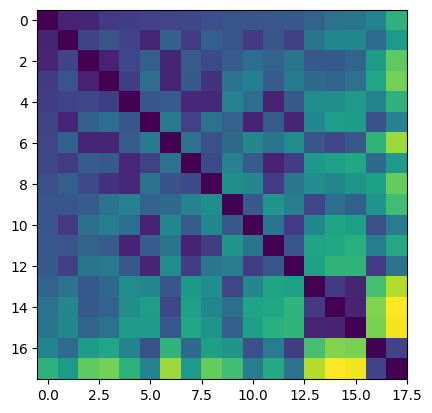

In [195]:
fig,ax = plt.subplots()
ax.imshow(adj_matrix)


In [196]:
np.amin(adj_matrix)

0.0